<a href="https://colab.research.google.com/github/nyulnyul/FootballValues/blob/main/footballvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,318 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [1]:
pip install pandas openpyxl

#데이터 전처리 과정

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumBarunGothic'

# 음수 부호 정상 출력을 위한 설정
mpl.rcParams['axes.unicode_minus'] = False


In [23]:
import pandas as pd
import os


from google.colab import drive

In [24]:
drive.mount('/content/drive')

# 파일 경로
file_path = '/content/drive/MyDrive/football.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##파일 존재 여부 파악

파일이 존재합니다.
파일이 성공적으로 불러와졌습니다.
   Unnamed: 0           name              full_name  age  height  \
0           1  Stefan Ortega   Stefan Ortega Moreno   30    1.85   
1           1  Stefan Ortega   Stefan Ortega Moreno   30    1.85   
2           4     Nathan Aké    Nathan Benjamin Aké   28    1.80   
3           4     Nathan Aké    Nathan Benjamin Aké   28    1.80   
4           7  Manuel Akanji  Manuel Obafemi Akanji   27    1.88   

                  nationality place_of_birth  price  max_price  \
0              Germany  Spain     Hofgeismar    6.0        6.0   
1              Germany  Spain     Hofgeismar    6.0        6.0   
2  Netherlands  Cote d'Ivoire       Den Haag   35.0       40.0   
3  Netherlands  Cote d'Ivoire       Den Haag   35.0       40.0   
4        Switzerland  Nigeria   Wiesendangen   30.0       40.0   

                 position  ...  Per 90 Minutes.4_G+A-PK Per 90 Minutes.5_xG  \
0              Goalkeeper  ...                     0.03                0.00   
1     

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 233 (\N{LATIN SMALL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


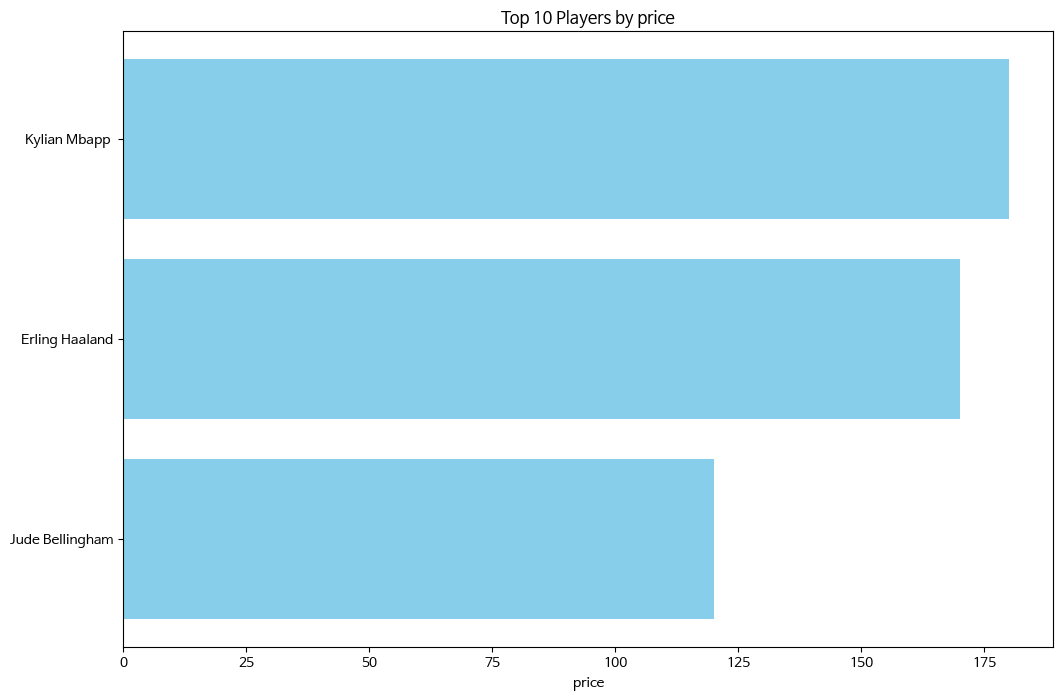

In [26]:
if os.path.exists(file_path):
    print("파일이 존재합니다.")
    try:
        # Excel 파일 불러오기
        df = pd.read_csv(file_path)
        print("파일이 성공적으로 불러와졌습니다.")

        # 데이터의 첫 몇 줄을 확인하여 구조 파악
        print(df.head())

        # 결측값 처리
        print("결측값 처리 전 각 열의 결측값 수:")
        print(df.isnull().sum())
        df.fillna(0, inplace=True)

        # 가장 높은 시장 가치를 가진 선수 찾기
        max_value_player = df.loc[df['price'].idxmax()]  # price 열을 사용하여 가장 높은 시장 가치를 가진 선수를 찾음
        print("가장 높은 시장 가치를 지닌 선수 정보:")
        print(max_value_player)

        # 시장 가치 상위 10명의 선수 시각화
        top_10_players = df.nlargest(10, 'price')  # 시장 가치 상위 10명의 선수를 찾음

        plt.figure(figsize=(12, 8))
        plt.barh(top_10_players['Player'], top_10_players['price'], color='skyblue')  #시장 가치를 시각화
        plt.xlabel('price')
        plt.title('Top 10 Players by price')
        plt.gca().invert_yaxis()
        plt.show()

    except Exception as e:
        print(f"파일을 불러오는 중 오류가 발생했습니다: {e}")
else:
    print("파일이 존재하지 않습니다. 경로를 확인하세요.")


In [6]:
df.head()

,Player,Nation,Pos,Age,Playing Time_MP,Playing Time.1_Starts,Playing Time.2_Min,Playing Time.3_90s,Performance_Gls,Performance.1_Ast,...,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s
0,Remo Freuler,ch SUI,MF,26.0,39.0,39.0,3349.0,37.2,2.0,6.0,...,0.21,0.10,0.12,0.21,0.10,0.21,0.0,0.0,0.0,0.0
1,Papu Gómez,ar ARG,"MF,FW",30.0,40.0,39.0,3344.0,37.2,9.0,11.0,...,0.54,0.26,0.40,0.66,0.26,0.66,0.0,0.0,0.0,0.0
2,Hans Hateboer,nl NED,DF,24.0,39.0,37.0,3333.0,37.0,5.0,5.0,...,0.27,0.16,0.15,0.31,0.16,0.31,0.0,0.0,0.0,0.0
3,Duván Zapata,co COL,FW,27.0,42.0,37.0,3333.0,37.0,26.0,8.0,...,0.89,0.59,0.30,0.88,0.54,0.83,0.0,0.0,0.0,0.0
4,Marten de Roon,nl NED,MF,27.0,39.0,38.0,3328.0,37.0,3.0,3.0,...,0.14,0.05,0.06,0.11,0.03,0.09,0.0,0.0,0.0,0.0


In [7]:
# 컬럼 이름을 한글로 변경
df.columns = [
    '선수', '국가', '포지션', '나이', '출전 경기 수', '선발 출전 수', '출전 시간 (분)', '풀타임 경기 수',
    '득점 수', '도움 수', '득점+도움 수', '필드골 (페널티 제외)', '페널티 득점', '페널티 시도', '경고 (옐로 카드)', '퇴장 (레드 카드)',
    '기대 득점', '기대 득점 (페널티 제외)', '기대 도움', '기대 득점+기대 도움 (페널티 제외)', '공 진척 (드리블)', '패스 진척', '달리기 진척',
    '90분당 득점', '90분당 도움', '90분당 득점+도움', '90분당 필드골 (페널티 제외)', '90분당 득점+도움 (페널티 제외)',
    '90분당 기대 득점', '90분당 기대 도움', '90분당 기대 득점+도움', '90분당 기대 득점 (페널티 제외)', '90분당 기대 득점+기대 도움 (페널티 제외)',
    '출전 경기 수', '선발 출전 수', '출전 시간 (분)', '풀타임 경기 수'
]

# 데이터프레임 확인
print(df.head())

               선수      국가    포지션    나이  출전 경기 수  선발 출전 수  출전 시간 (분)  풀타임 경기 수  \
0    Remo Freuler  ch SUI     MF  26.0     39.0     39.0     3349.0      37.2   
1      Papu Gómez  ar ARG  MF,FW  30.0     40.0     39.0     3344.0      37.2   
2   Hans Hateboer  nl NED     DF  24.0     39.0     37.0     3333.0      37.0   
3    Duván Zapata  co COL     FW  27.0     42.0     37.0     3333.0      37.0   
4  Marten de Roon  nl NED     MF  27.0     39.0     38.0     3328.0      37.0   

   득점 수  도움 수  ...  90분당 득점+도움 (페널티 제외)  90분당 기대 득점  90분당 기대 도움  \
0   2.0   6.0  ...                 0.21        0.10        0.12   
1   9.0  11.0  ...                 0.54        0.26        0.40   
2   5.0   5.0  ...                 0.27        0.16        0.15   
3  26.0   8.0  ...                 0.89        0.59        0.30   
4   3.0   3.0  ...                 0.14        0.05        0.06   

   90분당 기대 득점+도움  90분당 기대 득점 (페널티 제외)  90분당 기대 득점+기대 도움 (페널티 제외)  출전 경기 수  \
0           0.21                 

#EDA 상관분석
- 피어슨 상관 계수 이용 독립변수와 이적료 간 상관관계 파악

In [14]:
# 숫자형 열만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

## 이상치 필터링

In [15]:
 #IQR을 이용한 이상치 처리
Q1 = numeric_df.quantile(0.25)  # 25번째 백분위수 (하위 사분위수)
Q3 = numeric_df.quantile(0.75)  # 75번째 백분위수 (상위 사분위수)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# 이상치의 하한 및 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 포함하는 조건
outliers_condition = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# 이상치가 있는 행을 필터링하여 확인
print("이상치가 있는 행:")
print(df[outliers_condition.any(axis=1)])

# 이상치를 제거 (선택 사항)
df_cleaned = df[~outliers_condition.any(axis=1)]


이상치가 있는 행:
                        선수      국가    포지션    나이  출전 경기 수  선발 출전 수  출전 시간 (분)  \
0             Remo Freuler  ch SUI     MF  26.0     39.0     39.0     3349.0   
1               Papu Gómez  ar ARG  MF,FW  30.0     40.0     39.0     3344.0   
2            Hans Hateboer  nl NED     DF  24.0     39.0     37.0     3333.0   
3             Duván Zapata  co COL     FW  27.0     42.0     37.0     3333.0   
4           Marten de Roon  nl NED     MF  27.0     39.0     38.0     3328.0   
...                    ...     ...    ...   ...      ...      ...        ...   
17094        Renaud Ripart  fr FRA  FW,MF  29.0      0.0      0.0        0.0   
17097      Florian Tardieu  fr FRA     MF  30.0      0.0      0.0        0.0   
17100     Papa Ndiaga Yade  sn SEN  DF,MF  22.0      0.0      0.0        0.0   
17102  Jeff Reine-Adélaïde  fr FRA     MF  24.0      0.0      0.0        0.0   
17111       Ante Palaversa  hr CRO     MF  22.0      0.0      0.0        0.0   

       풀타임 경기 수  득점 수  도움 수 

## 피어슨 상관 분석

In [16]:

# 상관 분석
corr = numeric_df.corr(method='pearson')

# 상관 계수 행렬 출력
print(corr)

                                 나이   출전 경기 수   선발 출전 수  출전 시간 (분)  풀타임 경기 수  \
나이                         1.000000  0.080158  0.086669   0.086702  0.086703   
출전 경기 수                    0.080158  1.000000  0.966171   0.973221  0.973219   
선발 출전 수                    0.086669  0.966171  1.000000   0.997962  0.997963   
출전 시간 (분)                  0.086702  0.973221  0.997962   1.000000  0.999999   
풀타임 경기 수                   0.086703  0.973219  0.997963   0.999999  1.000000   
득점 수                       0.153290  0.126380  0.126509   0.125265  0.125285   
도움 수                       0.158713  0.144516  0.147517   0.145591  0.145613   
득점+도움 수                    0.171651  0.147291  0.148630   0.146971  0.146994   
필드골 (페널티 제외)               0.143297  0.126391  0.124559   0.123649  0.123668   
페널티 득점                     0.126106  0.070684  0.078667   0.076627  0.076639   
페널티 시도                     0.135826  0.074564  0.083760   0.081594  0.081612   
경고 (옐로 카드)                 0.275514  0.1

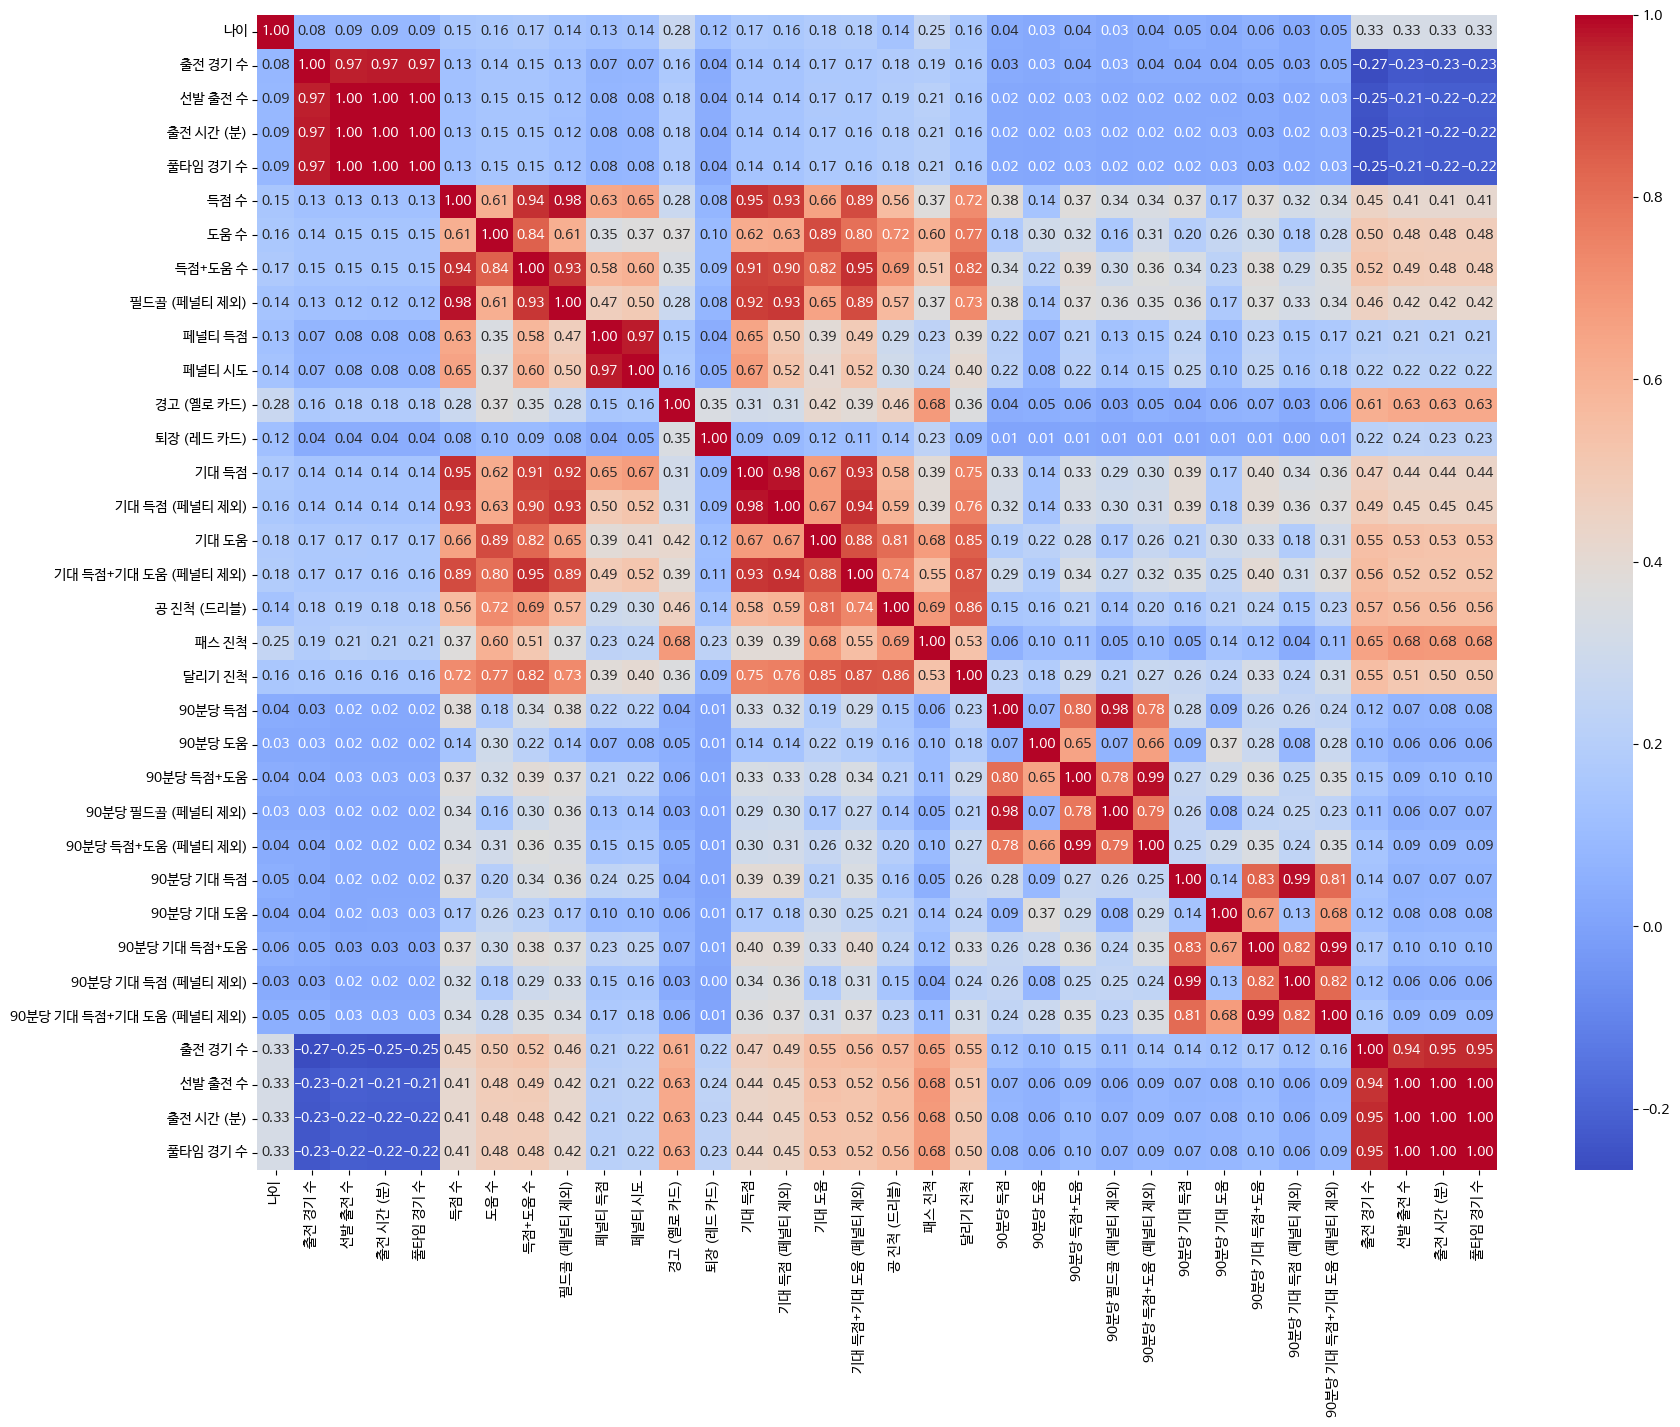

In [17]:

# 상관 계수 행렬 시각화
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
# 분석에 사용할 열 선택
features = ['나이', '출전 경기 수', '득점 수', '도움 수', '기대 득점', '기대 도움']
target = '이적료'


In [21]:
 #데이터 분할
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')

# 피처 중요도 분석
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[sorted_idx], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

KeyError: '이적료'